# Classification Algorithms

In [2]:
#   packages
import gc
import os

import json
import pandas as pd
import numpy as np

import collections

from sklearn.model_selection import train_test_split

## Vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

## Classifiers
##> Logistic Regression
from sklearn.linear_model import LogisticRegression
##> Naive Bayes
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
##> K-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
##> Support Vector Machines
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
##> Decision Tree
from sklearn.tree import DecisionTreeClassifier
##> Random Forest
from sklearn.ensemble import RandomForestClassifier
##> Bagging
from sklearn.ensemble import BaggingClassifier
##> AdaBoost
from sklearn.ensemble import AdaBoostClassifier

## prediction score
from sklearn.metrics import accuracy_score

In [3]:
preProcDF = pd.DataFrame.from_dict(json.load(open('data/yelp_example_1.json')))

documents = preProcDF["docs"].str.join(" ")

documents

0       place WAAAY price generic cuisine serve aside ...
1       taxi driver tell go place thank group love foo...
2       not worth be buffet connoisseur high hope crow...
3       great american cuisine hearty helping fair pri...
4       bacon burger delicious burger ever eat bartend...
                              ...                        
4995    great day table friend decide hit say highly r...
4996    order take deliver hotel conference attend rea...
4997    go large party birthday make easy make reserva...
4998    never 1\/2 hour wait guestlist arrive unfriend...
4999    l'atelier mean good butter call ghetto want go...
Name: docs, Length: 5000, dtype: object

### Vectorizers

In [4]:
# Binary vectorizer
binary_vect = CountVectorizer(binary=True)
X_binary = binary_vect.fit_transform(documents).toarray()

np.unique(X_binary)

array([0, 1], dtype=int64)

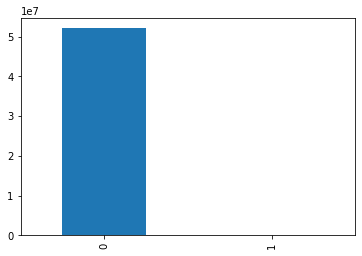

In [5]:
fig=pd.Series(X_binary.flatten()).value_counts().plot(kind='bar')
labelFig=fig.get_figure()

In [6]:
# Count vectorizer
count_vect = CountVectorizer(binary=False)
X_counts = count_vect.fit_transform(documents).toarray()

print(np.unique(X_counts))

for key, value in collections.Counter(X_counts.flatten()).items():
   print(f"{key}: {value}")

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 22 27]
0: 52068678
1: 170893
2: 21916
3: 5443
4: 1809
5: 627
6: 318
8: 76
10: 22
7: 132
16: 2
9: 49
15: 4
11: 12
12: 5
13: 5
17: 2
27: 1
19: 1
20: 3
18: 1
22: 1


In [7]:
# TF vectorizer
tf_vect = TfidfVectorizer(use_idf=False)
X_tf = tf_vect.fit_transform(documents).toarray()

np.unique(X_tf)

for key, value in collections.Counter(X_tf.flatten()).items():
   print(f"{key}: {value}")

0.0: 52068678
0.22360679774997896: 1455
0.20851441405707477: 1293
0.41702882811414954: 96
0.1889822365046136: 1453
0.3779644730092272: 322
0.2886751345948129: 898
0.24253562503633297: 1369
0.48507125007266594: 78
0.3333333333333333: 595
0.1643989873053573: 1456
0.3287979746107146: 126
0.4931969619160719: 23
0.25607375986579195: 112
0.12803687993289598: 955
0.3841106397986879: 24
0.5570860145311556: 15
0.18569533817705186: 1264
0.3713906763541037: 129
0.3922322702763681: 108
0.19611613513818404: 1384
0.22941573387056174: 1116
0.4588314677411235: 77
0.30151134457776363: 892
0.6030226891555273: 16
0.25: 1364
0.5: 126
0.14002800840280097: 1152
0.28005601680560194: 124
0.5601120336112039: 9
0.42008402520840293: 17
0.10369516947304253: 761
0.20739033894608505: 112
0.4147806778921701: 4
0.16012815380508713: 1458
0.32025630761017426: 119
0.23284515771189984: 19
0.15523010514126656: 75
0.07761505257063328: 427
0.3880752628531664: 2
0.17677669529663687: 1313
0.5303300858899106: 11
0.124034734589

In [8]:
# TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(documents).toarray()

np.unique(X_tfidf)

for key, value in collections.Counter(X_tfidf.flatten()).items():
   if value==1:
      pass
   else:
      print(f"{key}: {value}")

0.0: 52068678
0.41488397556048806: 2
0.3366499573028203: 2
0.1445710543000421: 2
0.1881456121942442: 2
0.2525870583518886: 3
0.14481496978077624: 3
0.15178954462666025: 5
0.30528978543378965: 3
0.13181237475363056: 2
0.17013301037294848: 2
0.16294737109760957: 2
0.3379525414672939: 2
0.16369320509197557: 3
0.1282775366469518: 2
0.10814659095122145: 41
0.3244397728536643: 3
0.10317736533840532: 4
0.2162931819024429: 2
0.10856726018091364: 2
0.09549163566689046: 2
0.1832860831660836: 2
0.16425405034871082: 3
0.16046709744008572: 2
0.2539340675017508: 2
0.2053736066106151: 2
0.11273266419002104: 2
0.17975544351892014: 2
0.16095408902032202: 2
0.11400157326770119: 2
0.12642160836060526: 2
0.0937166624488928: 2
0.08716706400071608: 2
0.07757955722097735: 2
0.1183776044391158: 2
0.06768845813957944: 3
0.12117126382847541: 3
0.10775671482391895: 2
0.10539470946564819: 2
0.17437290949488807: 2
0.15506854750690519: 2
0.09740785902612394: 2
0.11407924284774097: 2
0.10153593261984399: 2
0.1514160

### Train and test set

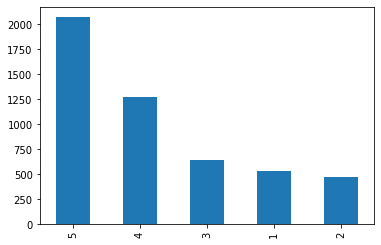

In [9]:
fig=preProcDF.scores.value_counts().plot(kind='bar')
labelFig=fig.get_figure()

In [10]:
labels = preProcDF.scores.tolist()
category_list = preProcDF.scores.unique()

X_bin_train, X_bin_test, y_bin_train, y_bin_test = train_test_split(X_binary, labels, train_size=0.85, stratify=labels, random_state=1)
X_count_train, X_count_test, y_count_train, y_count_test = train_test_split(X_counts, labels, train_size=0.85, stratify=labels, random_state=1)
X_tf_train, X_tf_test, y_tf_train, y_tf_test = train_test_split(X_tf, labels, train_size=0.85, stratify=labels, random_state=1)
X_tfidf_train, X_tfidf_test, y_tfidf_train, y_tfidf_test = train_test_split(X_tfidf, labels, train_size=0.85, stratify=labels, random_state=1)

## Logistic Regression

In [10]:
gc.collect()

model = LogisticRegression(solver='liblinear', C=10.0, random_state=0).fit(X_bin_train, y_bin_train)

print("classes:", model.classes_)
print("intercept:", model.intercept_)
print("coef:", model.coef_)

y_bin_test_pred = model.predict(X_bin_test)
print("Accuracy:", accuracy_score(y_bin_test, y_bin_test_pred))

classes: [1 2 3 4 5]
intercept: [-2.71039218 -3.58758287 -5.05394792 -1.67868929 -0.33944145]
coef: [[-9.63929406e-05 -5.90260827e-05 -1.74507120e-05 ... -5.93204749e-02
  -3.12684146e-03 -5.93204749e-02]
 [-8.54973889e-02 -1.98559650e-03 -2.90442773e-05 ... -3.30595070e-02
  -7.42260822e-05 -3.30595070e-02]
 [-7.10221136e-05 -7.93375836e-02 -1.24252004e-03 ... -8.37588866e-03
  -1.44870504e-01 -8.37588866e-03]
 [ 6.96767449e-01  8.09957159e-01 -9.01145859e-02 ... -3.56137648e-02
   1.27065631e+00 -3.56137648e-02]
 [-9.19267074e-01 -6.08296236e-01  3.63758026e-02 ...  6.16939024e-02
  -9.31305270e-01  6.16939024e-02]]
Accuracy: 0.49733333333333335


In [11]:
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0).fit(X_count_train, y_count_train)

y_count_test_pred = model.predict(X_count_test)
print("Accuracy:", accuracy_score(y_count_test, y_count_test_pred))

Accuracy: 0.48933333333333334


In [12]:
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0).fit(X_tf_train, y_tf_train)

y_tf_test_pred = model.predict(X_tf_test)
print("Accuracy:", accuracy_score(y_tf_test, y_tf_test_pred))

Accuracy: 0.5506666666666666


In [13]:
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0).fit(X_tfidf_train, y_tfidf_train)

y_tfidf_test_pred = model.predict(X_tfidf_test)
print("Accuracy:", accuracy_score(y_tfidf_test, y_tfidf_test_pred))

Accuracy: 0.552


In [14]:
for c_param in [1.0, 10.0, 50.0, 100.0, 1000.0]:
    model = LogisticRegression(solver='liblinear', C=c_param, random_state=0).fit(X_tfidf_train, y_tfidf_train)
    y_tfidf_test_pred = model.predict(X_tfidf_test)
    print(str(c_param), "Accuracy:", accuracy_score(y_tfidf_test, y_tfidf_test_pred))

1.0 Accuracy: 0.556
10.0 Accuracy: 0.552
50.0 Accuracy: 0.5186666666666667
100.0 Accuracy: 0.516
1000.0 Accuracy: 0.5


## Naive Bayes

### Bernoulli Naive Bayes

In [15]:
gc.collect()

model_BNB = BernoulliNB().fit(X_bin_train, y_bin_train)

y_bin_test_pred = model_BNB.predict(X_bin_test)
print("Accuracy:", accuracy_score(y_bin_test, y_bin_test_pred))

Accuracy: 0.45866666666666667


### Multinomial Naive Bayes

In [16]:
gc.collect()

model_MNB = MultinomialNB().fit(X_count_train, y_count_train)

y_count_test_pred = model_MNB.predict(X_count_test)
print("Accuracy:", accuracy_score(y_count_test, y_count_test_pred))

Accuracy: 0.5533333333333333


In [17]:
model_MNB = MultinomialNB().fit(X_tf_train, y_tf_train)

y_tf_test_pred = model_MNB.predict(X_tf_test)
print("Accuracy:", accuracy_score(y_tf_test, y_tf_test_pred))

Accuracy: 0.41333333333333333


In [18]:
model_MNB = MultinomialNB().fit(X_tfidf_train, y_tfidf_train)

y_tfidf_test_pred = model_MNB.predict(X_tfidf_test)
print("Accuracy:", accuracy_score(y_tfidf_test, y_tfidf_test_pred))

Accuracy: 0.4146666666666667


### Complement Naive Bayes

In [19]:
gc.collect()

model_CNB = ComplementNB().fit(X_count_train, y_count_train)

y_count_test_pred = model_CNB.predict(X_count_test)
print("Accuracy:", accuracy_score(y_count_test, y_count_test_pred))

Accuracy: 0.5426666666666666


In [20]:
model_CNB = ComplementNB().fit(X_tf_train, y_tf_train)

y_tf_test_pred = model_CNB.predict(X_tf_test)
print("Accuracy:", accuracy_score(y_tf_test, y_tf_test_pred))

Accuracy: 0.5013333333333333


In [21]:
model_CNB = ComplementNB().fit(X_tfidf_train, y_tfidf_train)

y_tfidf_test_pred = model_CNB.predict(X_tfidf_test)
print("Accuracy:", accuracy_score(y_tfidf_test, y_tfidf_test_pred))

Accuracy: 0.5293333333333333


## K-Nearest Neighbor

In [22]:
gc.collect()

for nNB in range(1, 501, 100):
    model_kNN = KNeighborsClassifier(n_neighbors=nNB).fit(X_bin_train, y_bin_train)
    y_bin_test_pred = model_kNN.predict(X_bin_test)
    print(str(nNB), "Accuracy:", accuracy_score(y_bin_test, y_bin_test_pred))

1 Accuracy: 0.37333333333333335
101 Accuracy: 0.41333333333333333
201 Accuracy: 0.41333333333333333
301 Accuracy: 0.41333333333333333
401 Accuracy: 0.41333333333333333


In [23]:
for nNB in range(1, 501, 100):
    model_kNN = KNeighborsClassifier(n_neighbors=nNB).fit(X_count_train, y_count_train)
    y_count_test_pred = model_kNN.predict(X_count_test)
    print(str(nNB), "Accuracy:", accuracy_score(y_count_test, y_count_test_pred))

1 Accuracy: 0.392
101 Accuracy: 0.42533333333333334
201 Accuracy: 0.4226666666666667
301 Accuracy: 0.42133333333333334
401 Accuracy: 0.416


In [24]:
for nNB in range(1, 501, 100):
    model_kNN = KNeighborsClassifier(n_neighbors=nNB).fit(X_tf_train, y_tf_train)
    y_tf_test_pred = model_kNN.predict(X_tf_test)
    print(str(nNB), "Accuracy:", accuracy_score(y_tf_test, y_tf_test_pred))

1 Accuracy: 0.38
101 Accuracy: 0.4866666666666667
201 Accuracy: 0.5066666666666667
301 Accuracy: 0.492
401 Accuracy: 0.4706666666666667


In [25]:
for nNB in range(1, 501, 100):
    model_kNN = KNeighborsClassifier(n_neighbors=nNB).fit(X_tfidf_train, y_tfidf_train)
    y_tfidf_test_pred = model_kNN.predict(X_tfidf_test)
    print(str(nNB), "Accuracy:", accuracy_score(y_tfidf_test, y_tfidf_test_pred))

1 Accuracy: 0.39466666666666667
101 Accuracy: 0.49333333333333335
201 Accuracy: 0.476
301 Accuracy: 0.46
401 Accuracy: 0.44533333333333336


## Support Vector Machine

LinearSVC

Similar to SVC with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.

In [26]:
gc.collect()

for c_param in np.arange(1.0, 501.0, 100.0):
    model_lSVC = LinearSVC(C=c_param, max_iter=10000).fit(X_bin_train, y_bin_train)
    y_bin_test_pred = model_lSVC.predict(X_bin_test)
    print(str(c_param), "Accuracy:", accuracy_score(y_bin_test, y_bin_test_pred))

1.0 Accuracy: 0.488
101.0 Accuracy: 0.46266666666666667
201.0 Accuracy: 0.46266666666666667
301.0 Accuracy: 0.46266666666666667
401.0 Accuracy: 0.464


In [27]:
for c_param in np.arange(1.0, 501.0, 100.0):
    model_lSVC = LinearSVC(C=c_param, max_iter=10000).fit(X_count_train, y_count_train)
    y_count_test_pred = model_lSVC.predict(X_count_test)
    print(str(c_param), "Accuracy:", accuracy_score(y_count_test, y_count_test_pred))

1.0 Accuracy: 0.47733333333333333
101.0 Accuracy: 0.448
201.0 Accuracy: 0.448
301.0 Accuracy: 0.45066666666666666
401.0 Accuracy: 0.45066666666666666


In [28]:
for c_param in np.arange(1.0, 501.0, 100.0):
    model_lSVC = LinearSVC(C=c_param, max_iter=10000).fit(X_tf_train, y_tf_train)
    y_tf_test_pred = model_lSVC.predict(X_tf_test)
    print(str(c_param), "Accuracy:", accuracy_score(y_tf_test, y_tf_test_pred))

1.0 Accuracy: 0.5453333333333333
101.0 Accuracy: 0.468
201.0 Accuracy: 0.464
301.0 Accuracy: 0.46
401.0 Accuracy: 0.45866666666666667


In [29]:
for c_param in np.arange(1.0, 501.0, 100.0):
    model_lSVC = LinearSVC(C=c_param, max_iter=10000).fit(X_tfidf_train, y_tfidf_train)
    y_tfidf_test_pred = model_lSVC.predict(X_tfidf_test)
    print(str(c_param), "Accuracy:", accuracy_score(y_tfidf_test, y_tfidf_test_pred))

1.0 Accuracy: 0.5466666666666666
101.0 Accuracy: 0.476
201.0 Accuracy: 0.476
301.0 Accuracy: 0.4746666666666667
401.0 Accuracy: 0.4746666666666667


## Decision Tree

In [33]:
gc.collect()

#   max_depth : The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

for max_d in [None, 3, 5, 10, 20, 50]:
    model_DT = DecisionTreeClassifier(max_depth=max_d).fit(X_bin_train, y_bin_train)
    y_bin_test_pred = model_DT.predict(X_bin_test)
    print(str(max_d), "Accuracy:", accuracy_score(y_bin_test, y_bin_test_pred))

None Accuracy: 0.44533333333333336
3 Accuracy: 0.4146666666666667
5 Accuracy: 0.44266666666666665
10 Accuracy: 0.4693333333333333
20 Accuracy: 0.45866666666666667
50 Accuracy: 0.42933333333333334


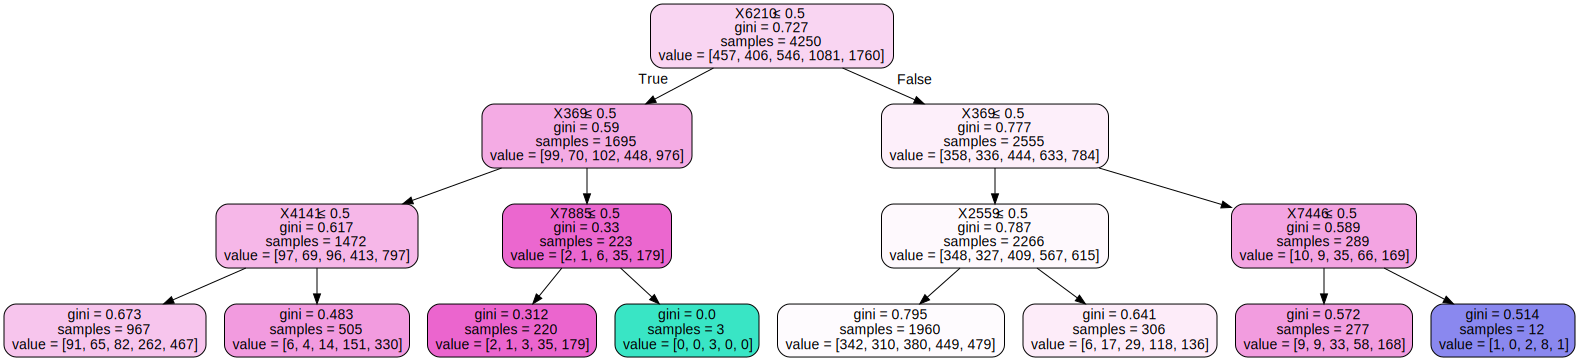

In [13]:
from sklearn import tree
import graphviz

model_DT = DecisionTreeClassifier(max_depth=3).fit(X_bin_train, y_bin_train)

dot_data = tree.export_graphviz(model_DT, out_file=None, 
                      filled=True, rounded=True,  
                      special_characters=True)

graph = graphviz.Source(dot_data)
graph

In [34]:
for max_d in [None, 3, 5, 10, 20, 50]:
    model_DT = DecisionTreeClassifier(max_depth=max_d).fit(X_count_train, y_count_train)
    y_count_test_pred = model_DT.predict(X_count_test)
    print(str(max_d), "Accuracy:", accuracy_score(y_count_test, y_count_test_pred))

None Accuracy: 0.432
3 Accuracy: 0.416
5 Accuracy: 0.46
10 Accuracy: 0.4826666666666667
20 Accuracy: 0.4746666666666667
50 Accuracy: 0.464


In [35]:
for max_d in [None, 3, 5, 10, 20, 50]:
    model_DT = DecisionTreeClassifier(max_depth=max_d).fit(X_tf_train, y_tf_train)
    y_tf_test_pred = model_DT.predict(X_tf_test)
    print(str(max_d), "Accuracy:", accuracy_score(y_tf_test, y_tf_test_pred))

None Accuracy: 0.428
3 Accuracy: 0.4146666666666667
5 Accuracy: 0.4066666666666667
10 Accuracy: 0.45466666666666666
20 Accuracy: 0.436
50 Accuracy: 0.43333333333333335


In [36]:
for max_d in [None, 3, 5, 10, 20, 50]:
    model_DT = DecisionTreeClassifier(max_depth=max_d).fit(X_tfidf_train, y_tfidf_train)
    y_tfidf_test_pred = model_DT.predict(X_tfidf_test)
    print(str(max_d), "Accuracy:", accuracy_score(y_tfidf_test, y_tfidf_test_pred))

None Accuracy: 0.432
3 Accuracy: 0.412
5 Accuracy: 0.41333333333333333
10 Accuracy: 0.45066666666666666
20 Accuracy: 0.44266666666666665
50 Accuracy: 0.43333333333333335


## Random Forest

In [21]:
gc.collect()

for crit in ["gini", "entropy"]:
    model_RF = RandomForestClassifier(criterion=crit, max_depth=None).fit(X_bin_train, y_bin_train)
    y_bin_test_pred = model_RF.predict(X_bin_test)
    print(crit, "Accuracy:", accuracy_score(y_bin_test, y_bin_test_pred))

gini Accuracy: 0.508
entropy Accuracy: 0.504


In [22]:
for crit in ["gini", "entropy"]:
    model_RF = RandomForestClassifier(criterion=crit, max_depth=None).fit(X_count_train, y_count_train)
    y_count_test_pred = model_RF.predict(X_count_test)
    print(crit, "Accuracy:", accuracy_score(y_count_test, y_count_test_pred))

gini Accuracy: 0.508
entropy Accuracy: 0.5053333333333333


In [23]:
for crit in ["gini", "entropy"]:
    model_RF = RandomForestClassifier(criterion=crit, max_depth=None).fit(X_tf_train, y_tf_train)
    y_tf_test_pred = model_RF.predict(X_tf_test)
    print(crit, "Accuracy:", accuracy_score(y_tf_test, y_tf_test_pred))

gini Accuracy: 0.5013333333333333
entropy Accuracy: 0.5066666666666667


In [24]:
for crit in ["gini", "entropy"]:
    model_RF = RandomForestClassifier(criterion=crit, max_depth=None).fit(X_tfidf_train, y_tfidf_train)
    y_tfidf_test_pred = model_RF.predict(X_tfidf_test)
    print(crit, "Accuracy:", accuracy_score(y_tfidf_test, y_tfidf_test_pred))

gini Accuracy: 0.508
entropy Accuracy: 0.5


## Bagging

In [29]:
gc.collect()

model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=0).fit(X_bin_train, y_bin_train)
y_bin_test_pred = model.predict(X_bin_test)
print("Accuracy:", accuracy_score(y_bin_test, y_bin_test_pred))

Accuracy: 0.4866666666666667


In [30]:
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=0).fit(X_count_train, y_count_train)

y_count_test_pred = model.predict(X_count_test)
print("Accuracy:", accuracy_score(y_count_test, y_count_test_pred))

Accuracy: 0.4866666666666667


In [31]:
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=0).fit(X_tf_train, y_tf_train)

y_tf_test_pred = model.predict(X_tf_test)
print("Accuracy:", accuracy_score(y_tf_test, y_tf_test_pred))

Accuracy: 0.5013333333333333


In [32]:
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=0).fit(X_tfidf_train, y_tfidf_train)

y_tfidf_test_pred = model.predict(X_tfidf_test)
print("Accuracy:", accuracy_score(y_tfidf_test, y_tfidf_test_pred))

Accuracy: 0.488


## Boosting

In [45]:
gc.collect()

model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=0, learning_rate=10).fit(X_bin_train, y_bin_train)
y_bin_test_pred = model.predict(X_bin_test)
print("Accuracy:", accuracy_score(y_bin_test, y_bin_test_pred))

Accuracy: 0.43733333333333335


In [46]:
model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=0, learning_rate=10).fit(X_count_train, y_count_train)

y_count_test_pred = model.predict(X_count_test)
print("Accuracy:", accuracy_score(y_count_test, y_count_test_pred))

Accuracy: 0.43333333333333335


In [47]:
model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=0, learning_rate=10).fit(X_tf_train, y_tf_train)

y_tf_test_pred = model.predict(X_tf_test)
print("Accuracy:", accuracy_score(y_tf_test, y_tf_test_pred))

Accuracy: 0.42


In [48]:
model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=0, learning_rate=10).fit(X_tfidf_train, y_tfidf_train)

y_tfidf_test_pred = model.predict(X_tfidf_test)
print("Accuracy:", accuracy_score(y_tfidf_test, y_tfidf_test_pred))

Accuracy: 0.432


# Classification tips

### GridSearchCV

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

gc.collect()

param_grid = {'solver': ["liblinear"]
,'penalty': ["l2"]
,'C': [1.0, 10.0]
}

LR_model = LogisticRegression()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=LR_model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
grid_result = grid_search.fit(X_tfidf_train, y_tfidf_train)

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
y_tfidf_test_pred = grid_result.predict(X_tfidf_test)
print("Accuracy:", accuracy_score(y_tfidf_test, y_tfidf_test_pred))

### Pipeline

In [43]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('TfIdf', TfidfVectorizer()), #Step1 - TfIdf data
    ('clf', LogisticRegression()) #step2 - classifier
])

labels = preProcDF.scores.tolist()
category_list = preProcDF.scores.unique()

X_pipe_train, X_pipe_test, y_pipe_train, y_pipe_test = train_test_split(documents, labels, train_size=0.85, stratify=labels, random_state=1)

In [70]:
gc.collect()

param_grid = {'clf__solver': ["liblinear"]
,'clf__penalty': ["l2"]
,'clf__C': [1.0, 10.0]
}

cv = RepeatedStratifiedKFold(n_repeats=15, n_splits=50, random_state=1)
cv_grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)

cv_grid.fit(X_pipe_train, y_pipe_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=15, n_splits=50, random_state=1),
             error_score=0,
             estimator=Pipeline(steps=[('TfIdf', TfidfVectorizer()),
                                       ('clf', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'clf__C': [1.0, 10.0], 'clf__penalty': ['l2'],
                         'clf__solver': ['liblinear']},
             scoring='accuracy')

In [71]:
print("Best: %f using %s" % (cv_grid.best_score_, cv_grid.best_params_))

Best: 0.553804 using {'clf__C': 10.0, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}


In [72]:
y_predict = cv_grid.predict(X_pipe_test)
print('Accuracy of the best classifier after CV is %.3f%%' % (accuracy_score(y_pipe_test, y_predict)*100))

Accuracy of the best classifier after CV is 55.867%


### Save/Load model

In [73]:
import pickle

# save the model to disk
filename = 'gridPipeModel.sav'
pickle.dump(cv_grid, open(filename, 'wb'))

In [74]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
y_predict2 = loaded_model.predict(X_pipe_test)
print('Accuracy of the best classifier after CV is %.3f%%' % (accuracy_score(y_pipe_test, y_predict2)*100))

Accuracy of the best classifier after CV is 55.867%


### With balanced classes?

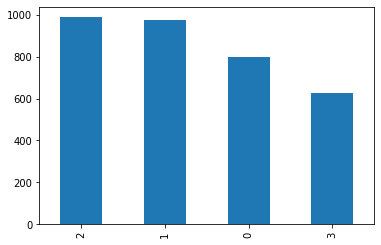

In [75]:
preProcDF_20ng = pd.read_pickle(os.path.join("data", "20newsgroups.pkl"))

fig=preProcDF_20ng.labels.value_counts().plot(kind='bar')
labelFig=fig.get_figure()

In [76]:
labels = preProcDF_20ng.labels.tolist()
category_list = preProcDF_20ng.labels.unique()

tfidf_vectorizer = TfidfVectorizer()
X_tfidf_20ng = tfidf_vectorizer.fit_transform(preProcDF_20ng.docs.str.join(" ")).toarray()

X_tfidf_train_20ng, X_tfidf_test_20ng, y_tfidf_train_20ng, y_tfidf_test_20ng = train_test_split(X_tfidf_20ng, labels, train_size=0.85, stratify=labels, random_state=1)

In [77]:
for c_param in [1.0, 10.0, 50.0, 100.0, 1000.0]:
    model = LogisticRegression(solver='liblinear', C=c_param, random_state=0).fit(X_tfidf_train_20ng, y_tfidf_train_20ng)
    y_tfidf_test_pred_20ng = model.predict(X_tfidf_test_20ng)
    print(str(c_param), "Accuracy:", accuracy_score(y_tfidf_test_20ng, y_tfidf_test_pred_20ng))

1.0 Accuracy: 0.9174852652259332
10.0 Accuracy: 0.9332023575638507
50.0 Accuracy: 0.9332023575638507
100.0 Accuracy: 0.9332023575638507
1000.0 Accuracy: 0.9332023575638507


In [81]:
## Or with Pipeline

pipeline = Pipeline([
    ('TfIdf', TfidfVectorizer()), #Step1 - TfIdf data
    ('clf', LogisticRegression()) #step2 - classifier
])

labels = preProcDF_20ng.labels.tolist()
category_list = preProcDF_20ng.labels.unique()

X_pipe_train, X_pipe_test, y_pipe_train, y_pipe_test = train_test_split(preProcDF_20ng.docs.str.join(" "), labels, train_size=0.85, stratify=labels, random_state=1)

gc.collect()

param_grid = {'clf__solver': ["liblinear", "lbfgs", "newton-cg"]
,'clf__penalty': ["l2"]
,'clf__C': [1.0, 10.0, 100.0]
}

cv = RepeatedStratifiedKFold(n_repeats=3, n_splits=15, random_state=1)
cv_grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)

cv_grid.fit(X_pipe_train, y_pipe_train)

y_predict = cv_grid.predict(X_pipe_test)
print('Accuracy of the best classifier after CV is %.3f%%' % (accuracy_score(y_pipe_test, y_predict)*100))

Accuracy of the best classifier after CV is 93.320%
